<a href="https://colab.research.google.com/github/MariamSalah18/Image-Task/blob/main/IP_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Processing Lab3

### Agenda
* What is a nueron
* Nueron in Computer Science
* Activation functions
* NN example
* Forward and backward propagation
* Deep Neural Network example
* CNN
* CNN components
* CNN example
* CNN assignment
<center><img src="https://namra.ir/static/kaggle/neuron-connection.png" height="300"></center>

Neural Networks (NNs) are one of the most important aspects of deep learning. Neural Networks are a set of algorithms inspired by neurons in the human brain.

## Neural Network

### The perceptron
A perceptron is the basic unit of a neural network. It has only 1 layer. A perceptron consists of input values, weights, a bias, a weighted sum and activation function. This is what a Perceptron looks like:
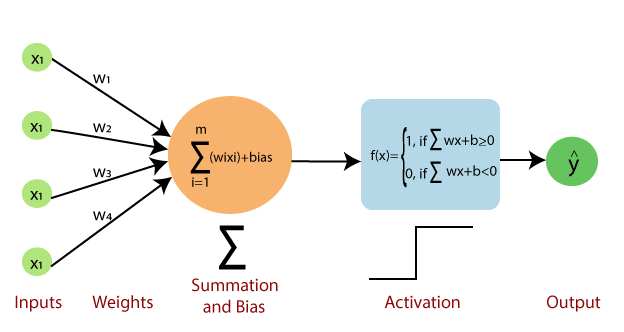

Weights: In simple terms weights decide how much influence the input will have on the output.

Bias: Basically it is a constant value. Bias allows you to shift the activation function by adding a constant.

### Activation Function

An Activation Function decides whether a neuron should be activated or not.
Note that using linear transformations ($f(x) = x$), we cannot model many functions such as $y=x^2$ or any more complex operatoin operation. Neural networks try to solve this problem by introducing some **non-linearity**.

#### Segmoid Activation function: $$\mathrm{sigmoid}(x) = \dfrac{1}{1+e^{-x}}$$
mostly used in binary classifaction problems output layer.
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png" height="400"></center>

#### The Rectified Linear Unit (ReLU)
mostly used in hidden layers.
<center><img src="https://machinelearningmastery.com/wp-content/uploads/2018/10/Line-Plot-of-Rectified-Linear-Activation-for-Negative-and-Positive-Inputs.png" height="450"></center>

#### Softmax
used in multi class classifiaction problems as output layer

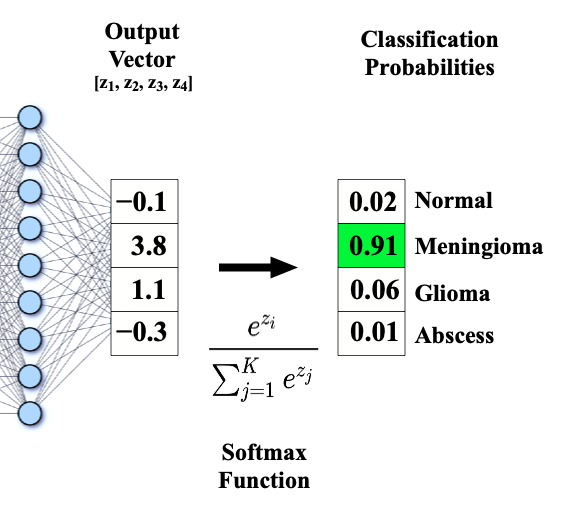

### Feed Forward

In a feed-forward neural network, information flows only in one direction. It is one of the simplest forms of a neural network. It is a Multi-Layered Perceptron (MLP) as it is composed of multiple perceptrons.

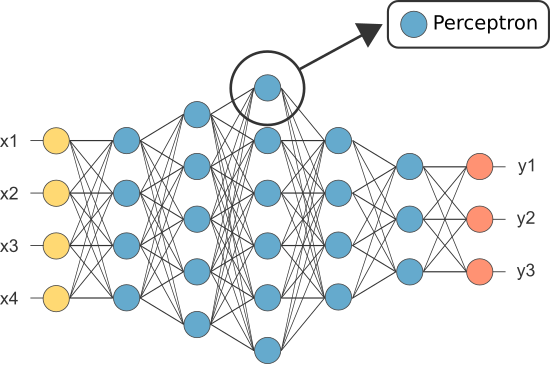

### Backward

In Backward Propagation the main goal is updating all weights according to the error signal after calculating the loss function in the output layer.

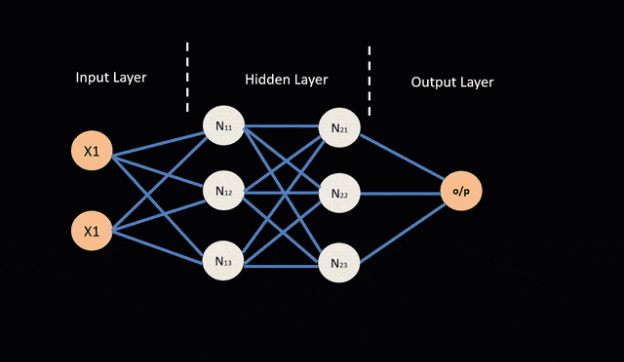

## Deep Neural Network

Test Deep Neural Network with minist Dataset

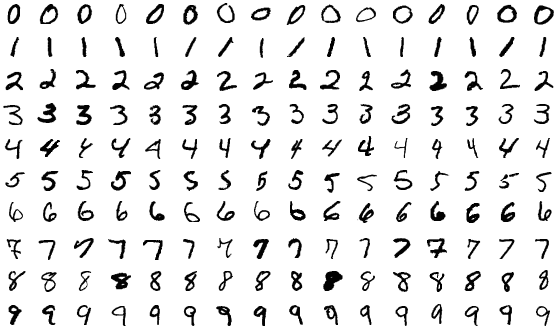

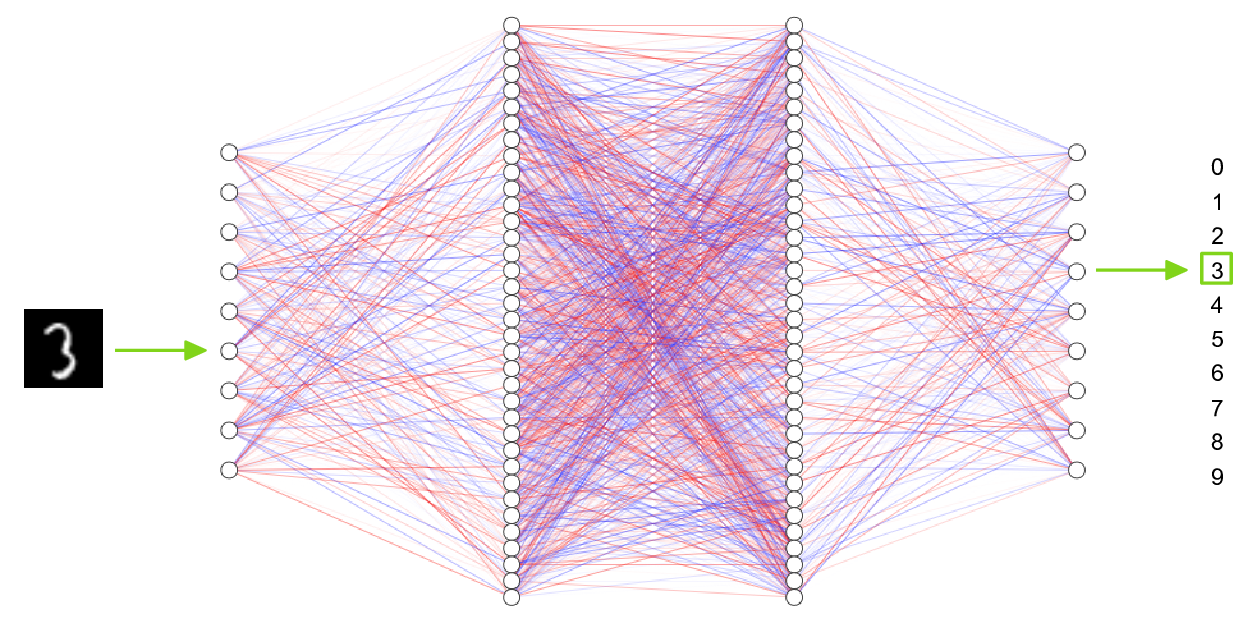

In [ ]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
from keras import utils

# Flattening the images from the 28x28 pixels to 1D 787 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

Before one hot encoding : **5**

After one hot encoding : [0., 0., 0., 0., 0., **1.**, 0., 0., 0., 0.]

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Dense: densely-connected NN layer.

units: Positive integer, dimensionality of the output space.

activation: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

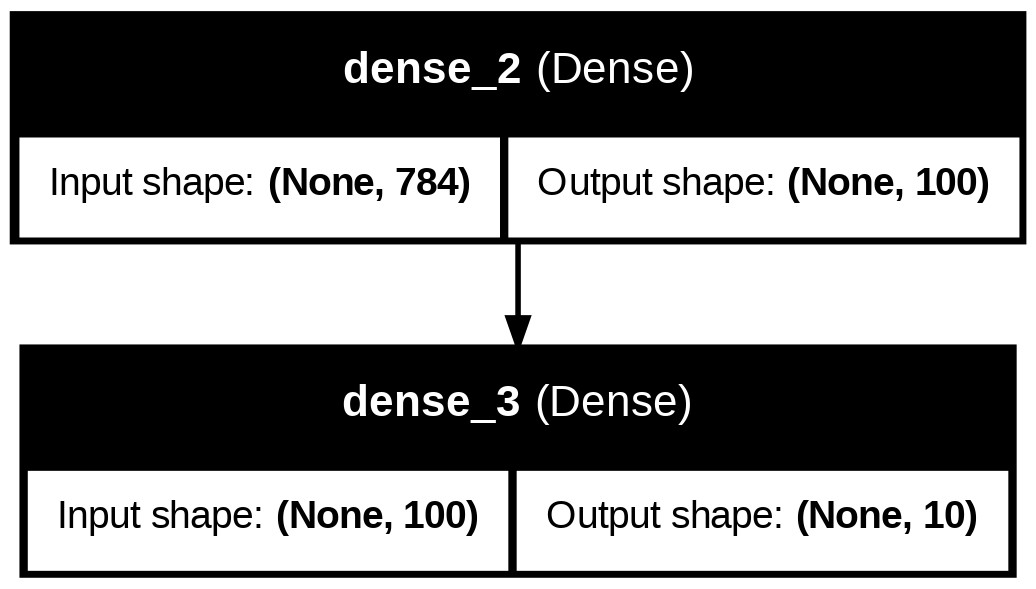

In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D


# building a linear stack of layers with the sequential model
model = Sequential()

# hidden layer
model.add(Dense(100, input_shape=(784,), activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

# looking at the model summary
model.summary()
utils.plot_model(model, to_file='mnist_mlp.png', show_shapes=True, show_layer_names=True)

Loss (**Categorical Crossentropy**) :
Used for multi-class classification with **one-hot encoded targets**.

*    [1,0,0] , [0,1,0], [0,0,1]

Loss (**Sparse Categorical Crossentropy**) :     
Similar to categorical_crossentropy but used when the true labels are not one-hot encoded but instead are **integer-encoded**.
*   [1] , [2], [3]

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8101 - loss: 0.6705 - val_accuracy: 0.9401 - val_loss: 0.2057
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.1809 - val_accuracy: 0.9569 - val_loss: 0.1476
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9611 - loss: 0.1342 - val_accuracy: 0.9639 - val_loss: 0.1202
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9725 - loss: 0.0980 - val_accuracy: 0.9696 - val_loss: 0.1035
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9779 - loss: 0.0785 - val_accuracy: 0.9736 - val_loss: 0.0917
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9814 - loss: 0.0665 - val_accuracy: 0.9762 - val_loss: 0.0836
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9841 - loss: 0.0586 - val_accuracy: 0.9762 - val_loss: 0.0783
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9868 - loss: 0.0476 - val_accuracy: 0.

## Convolution Neural Network

![convnet[1].jpeg](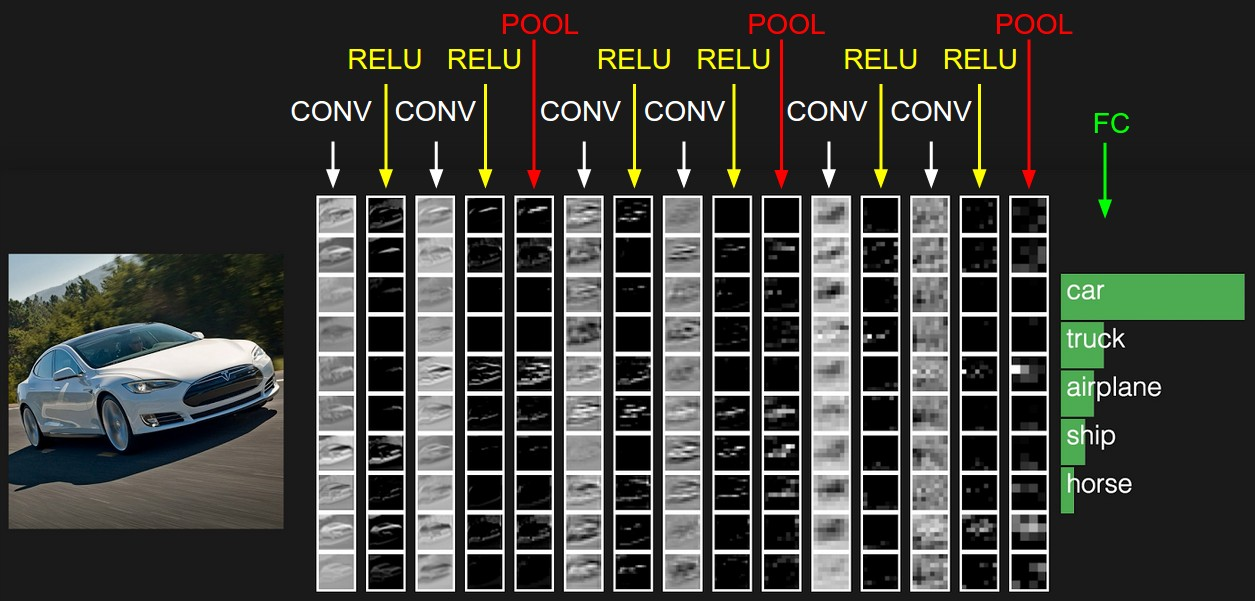)

#### A convolutional neural network is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology. It’s also known as a ConvNet. A convolutional neural network is used to detect and classify objects in an image.

#### Why **ConvNets** over Feed-Forward **Neural Networks**?

![1_GLQjM9k0gZ14nYF0XmkRWQ[1].png](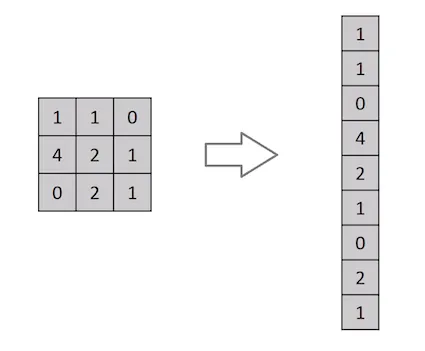)

One major advantage of using ConvNets over NNs is that you do not need to flatten the input images to 1D as they are capable of working with image data in 2D. This helps in retaining the “spatial” properties of images and having shared weights (kernels) instead of a distinct weight for each pixel

* Captures local patterns (like edges in images) efficiently.
* Requires fewer parameters due to shared filters.
* Recognizes objects even if they move (translation invariance).
* Builds features layer by layer (hierarchical feature learning).
* Handles large image data more efficiently.
* Outperforms neural networks in tasks like image recognition.


![1_uAeANQIOQPqWZnnuH-VEyw[1].jpeg](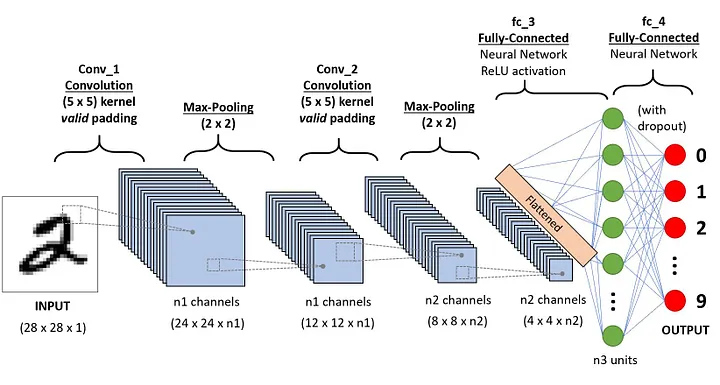)

### Layers in a Convolutional Neural Network
1. Convolutional Layer
> Extracts local features by applying filters (kernels) through convolution, detecting edges, textures, and patterns in the image.
2. Activation Layer (ReLU)
> Adds non-linearity using functions like ReLU (Rectified Linear Unit) to enable the model to learn complex patterns.
3. Pooling Layer (Max Pooling/Average Pooling)
> Reduces spatial dimensions (height and width) by selecting the maximum or average value in a region, helping with downsampling and reducing computation.
4. Flatten Layer
> Converts the 2D feature maps into a 1D vector, preparing the data for the fully connected (dense) layers.
5. Fully Connected (Dense) Layer
> Connects every neuron to all neurons in the previous layer, used to combine the features extracted by convolutional layers for classification.
6. Dropout Layer
> Randomly drops a fraction of neurons during training to prevent overfitting, improving model generalization.
7. Softmax Layer (Output Layer)
> Outputs probabilities for classification tasks, ensuring the values sum to 1 for multi-class problems.

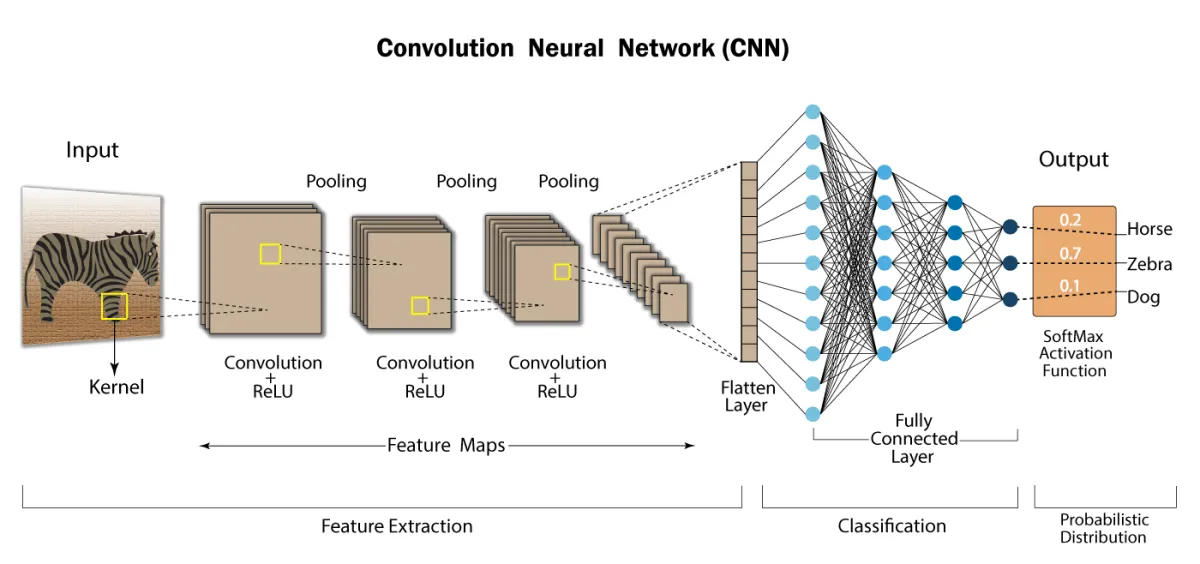

In the feature extraction part, the activations will be in the convolutional layers. The process is quite straightforward, after each convolution operation you multiply the result by an activation function.

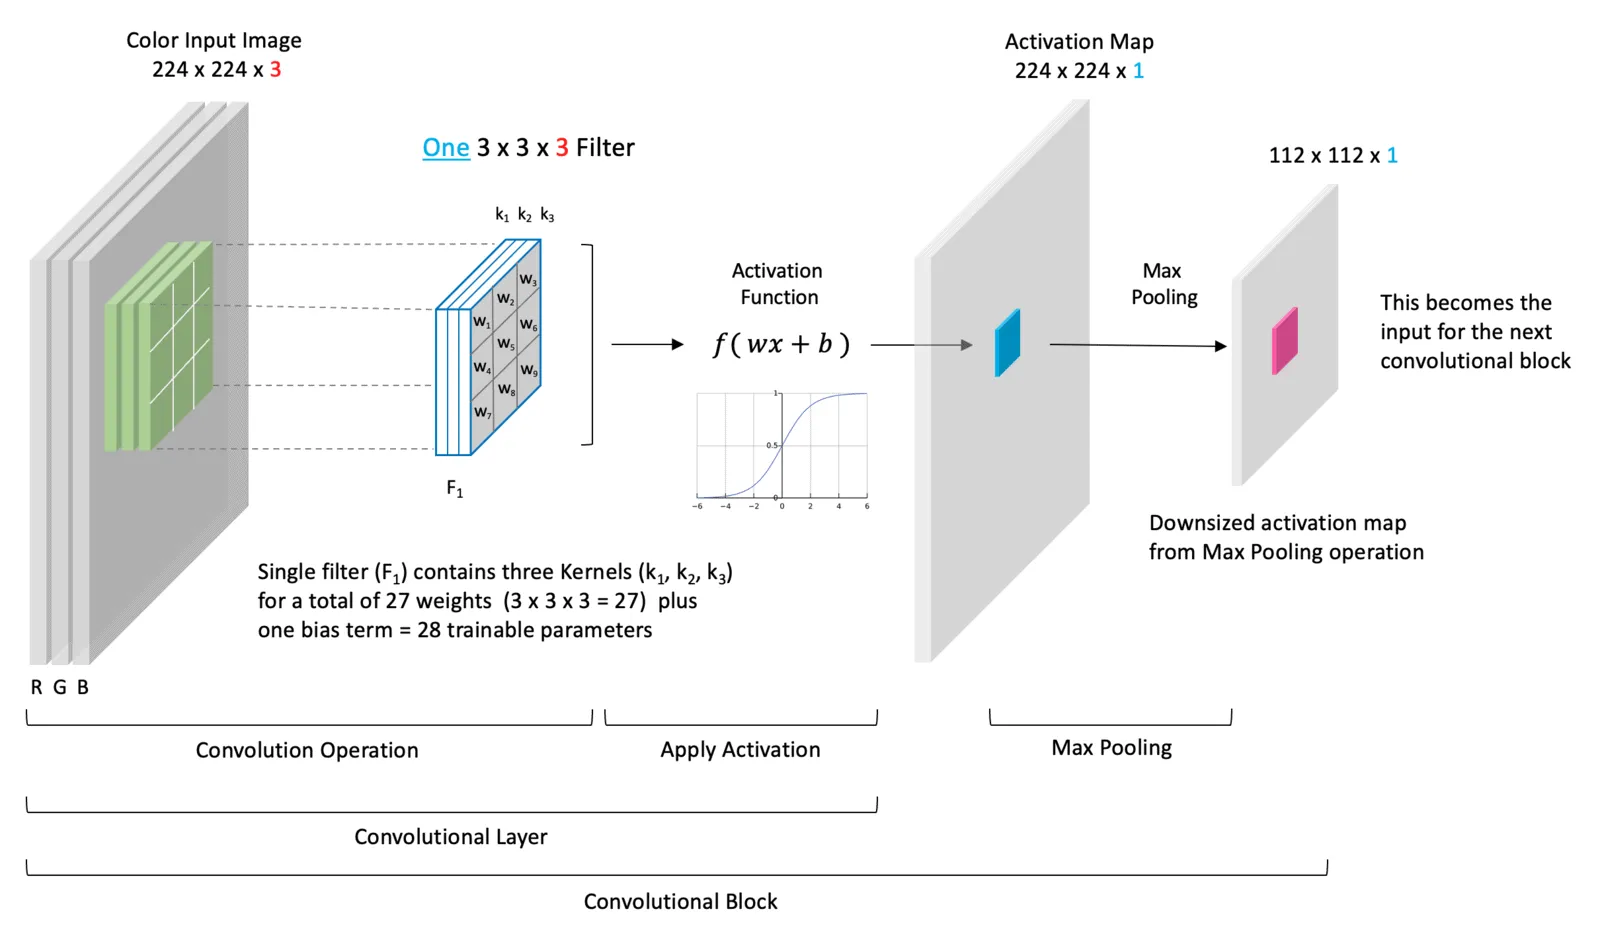

### Convolution Layer — The Kernel
Image Dimensions = 5 (Height) x 5 (Width) x 1 (Number of channels, eg. RGB)

* Convoluting a 5x5x1 image with a 3x3x1 kernel to get a 3x3x1 convolved feature

![1_GcI7G-JLAQiEoCON7xFbhg[1].gif](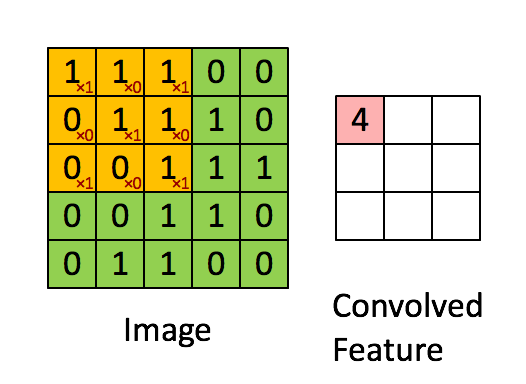)

![adNGg[1].png](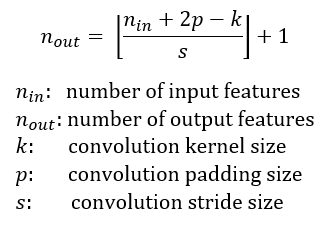)

#### Convolution with padding = 1 (**Same Padding**), Stride = 2
![1_1VJDP6qDY9-ExTuQVEOlVg[1].gif](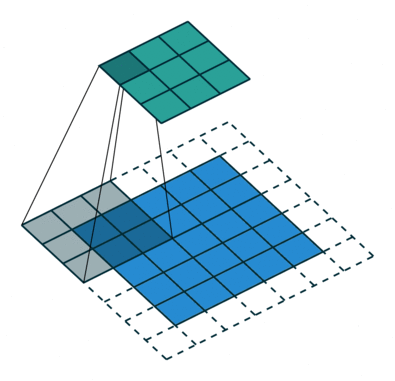)

#### Convolution with padding = 1 (**Same Padding**), Stride = 1
![1_nYf_cUIHFEWU1JXGwnz-Ig[1].gif](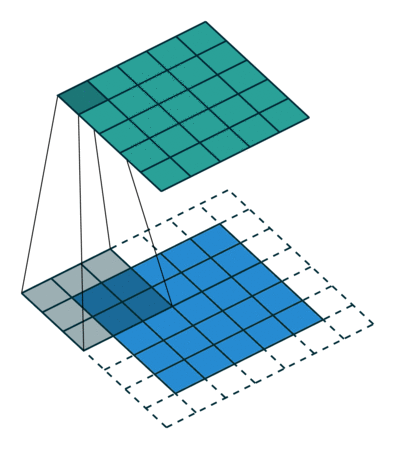)

#### In the case of images with **multiple channels** (e.g. RGB)

The Kernel has the same depth as that of the input image.

Matrix Multiplication is performed between Kernels
([K1, I1]; [K2, I2]; [K3, I3])

and all the results are summed with the bias to give us a squashed one-depth channel Convoluted Feature Output.

![1_ciDgQEjViWLnCbmX-EeSrA[1].gif](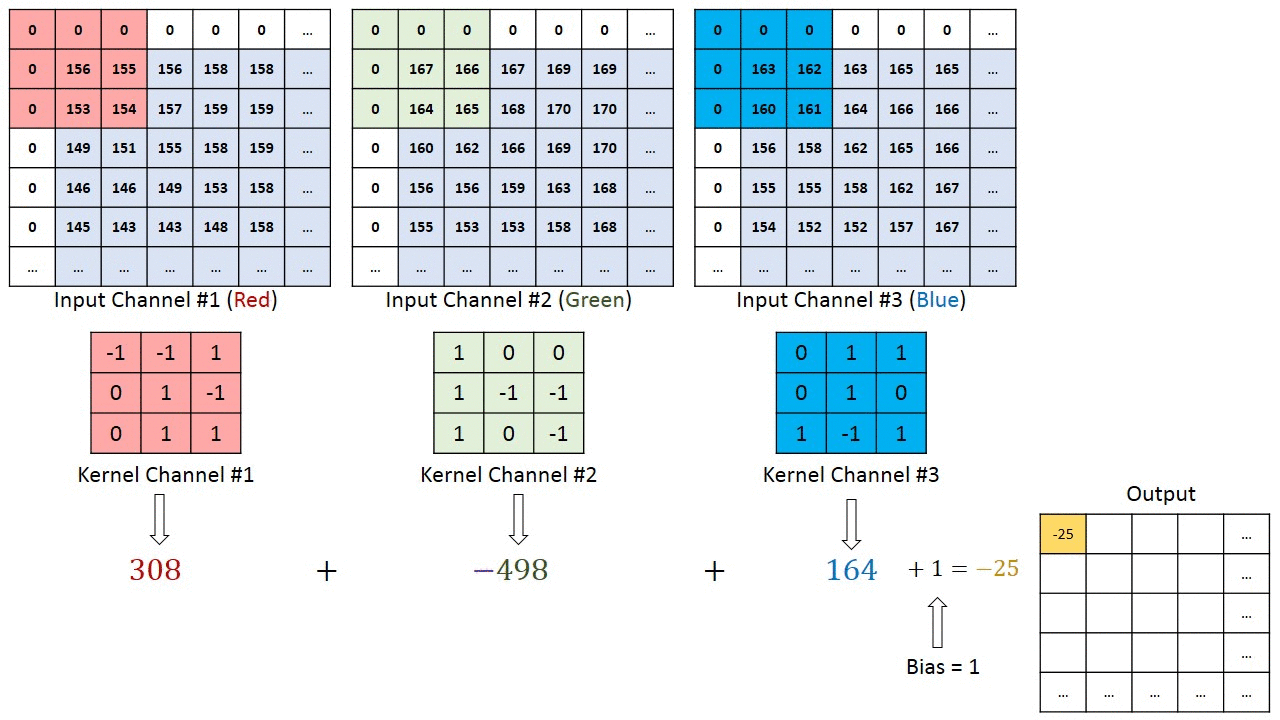)

#### After Convolution we apply activation function (Relu)

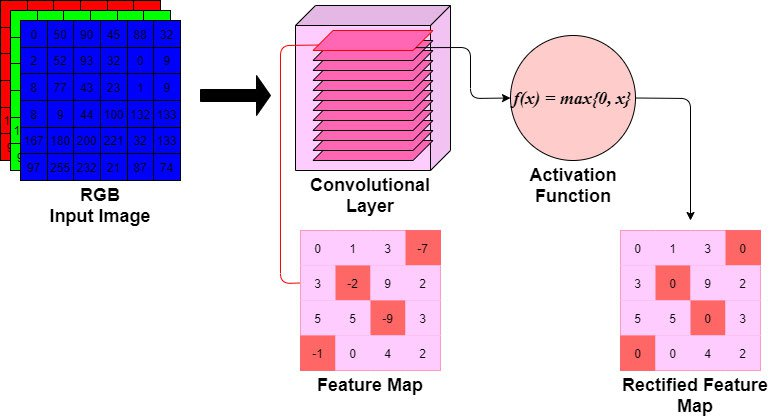

For inputs to the CNN, the depth is the number of channels in the image

(i.e., a depth of three when working with RGB images, one for each channel).

For volumes deeper in the network, the depth will be the number of filters applied in the previous layer.

### For example, 226 x 226 x 3 image (Input)

#### 1st Layer (**convolution layer**) **64 filters** with size [ 3 x 3 x 3 ]

#### H/W  = (226 - 3 / 1 ) + 1 = **224 x 224 x 64**(number of filters [ Depth ] )

### 64 Activation Maps (Feature Maps)

### Pooling Layer

the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training the model.


![pool[1].jpeg](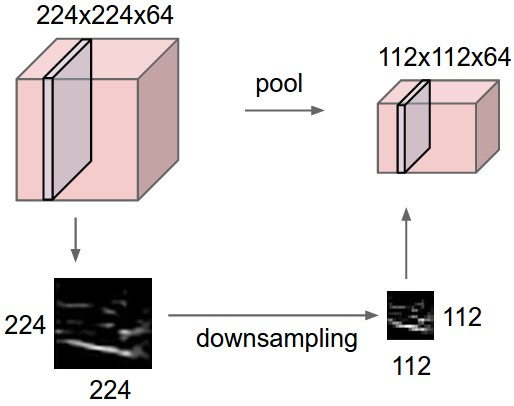)

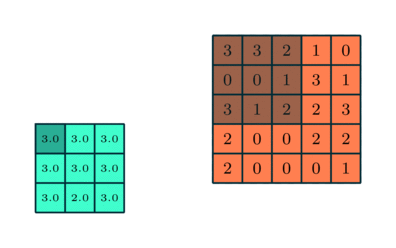

### Max Pooling also performs as a Noise Suppressant.

### It discards the noisy activations altogether and also performs de-noising along with **dimensionality reduction**.

### On the other hand, Average Pooling simply performs dimensionality reduction as a noise-suppressing mechanism. Hence,

### we can say that Max Pooling performs a lot better than Average Pooling.

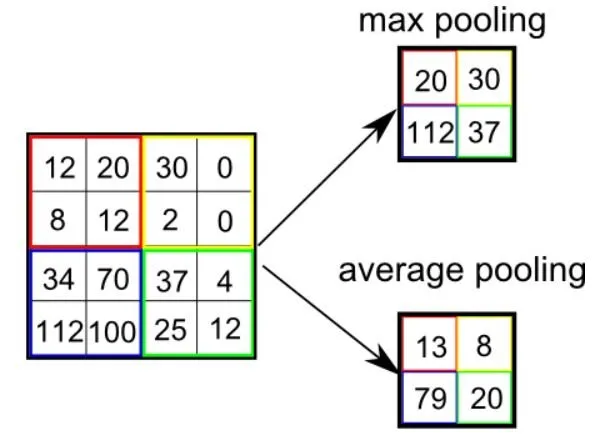

### Flatten
### The flattened matrix is fed as input to the fully connected layer to classify the image

flattening.png

fully_connected_layer.png

CNN_recognizes_a_bird1.png

### Sequential Example

In [ ]:
from keras.datasets import mnist

# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# keras imports for the dataset and building our neural network
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras import utils

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Kernel_size = 3 >> Kernel_size = (3,3)

strides = 1 >> strides = (1,1)

pool_size = 1 >> pool_size = (1,1)

**Conv2D**

number of filters, kernel size, stride, padding, activation after convolution


---


**Padding**

valid:
* No padding
* Output size is smaller than input.
* Used when reducing the feature map size is acceptable or desired.

same:
* Zero-padding applied.
* Output size is the same as input.
* Used when you want to maintain the same feature map size throughout the layers.




In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=1, padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=2))

# flatten output of conv
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 25)          │             250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 25)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4225)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         422,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,860 (1.62 MB)

 Trainable params: 423,860 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

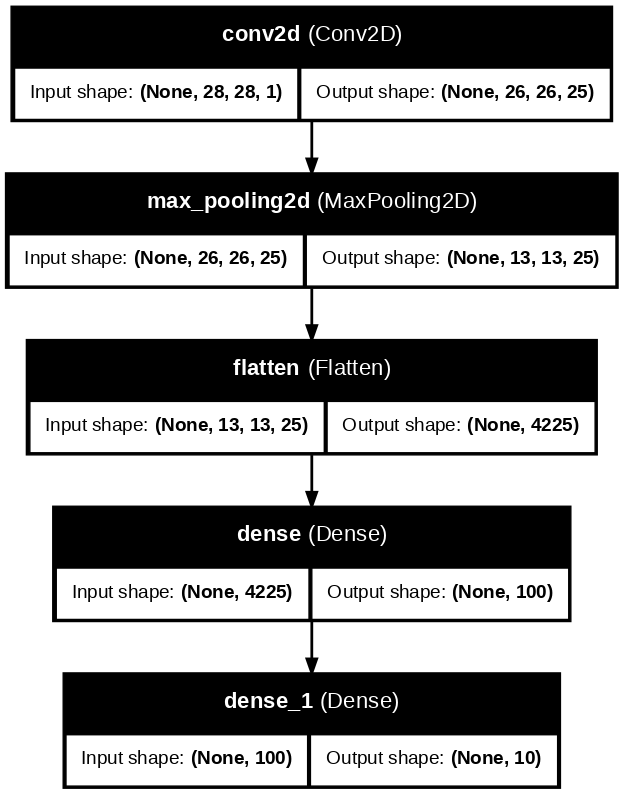

In [ ]:
utils.plot_model(model, to_file='model.png', dpi=100, show_shapes=True, show_layer_names=True)

In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8618 - loss: 0.4903 - val_accuracy: 0.9723 - val_loss: 0.0923
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9750 - loss: 0.0870 - val_accuracy: 0.9786 - val_loss: 0.0633
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9835 - loss: 0.0561 - val_accuracy: 0.9812 - val_loss: 0.0556
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9885 - loss: 0.0406 - val_accuracy: 0.9839 - val_loss: 0.0479
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9910 - loss: 0.0303 - val_accuracy: 0.9848 - val_loss: 0.0499
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9930 - loss: 0.0240 - val_accuracy: 0.9848 - val_loss: 0.0465
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9949 - loss: 0.0178 - val_accuracy: 0.9855 - val_loss: 0.0453
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9960 - loss: 0.0141 - val_accuracy: 

### CNN Task

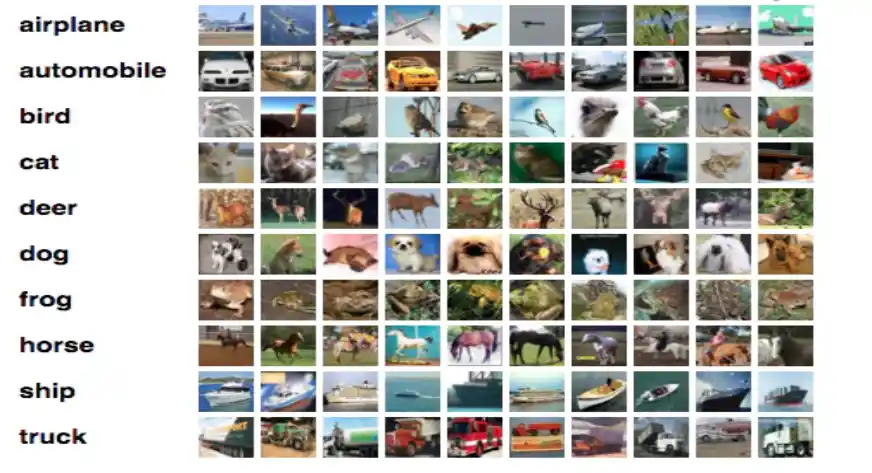

In [ ]:
from keras.datasets import cifar10

In [ ]:
cifar`